# Breast Cancer Recognition
#### Mt SAC CISB 62 Midterm Project Fall 2023
#### Alexander Alvarez

## Introduction

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import keras
from keras.layers import Dense, Dropout

import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix

from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from keras.layers import Flatten, Dropout
from tensorflow.keras.optimizers import Adam

2023-10-22 15:28:02.308340: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using TensorFlow backend


## Exploratory Data Analysis (EDA)

In [2]:
#load dataset
data = datasets.load_breast_cancer()

### print the keys

In [3]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


## Display some information about the project 

In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
# Read the Dataframe, first using the feature data
df = pd.DataFrame(data.data, columns=data.feature_names)

#Add a target column, and fill it with the target data
df['target'] = data.target
# Show the first five rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
#Create the variables X, y.
#For X, assing the values form the dataset, except the first and last columns
#For Y, assing the class value (the value in the last columns)

X= df.iloc[:, 1:-1].values
y= df.iloc[:, -1].values

In [8]:
#print X
X[0]

array([1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01, 3.001e-01,
       1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01, 8.589e+00,
       1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02, 3.003e-02,
       6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03, 1.622e-01,
       6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [9]:
#print the shape of X
X.shape

(569, 29)

In [10]:
#print y
y[0]

0

In [11]:
#print the shape of y
y.shape

(569,)

Text(0.5, 1.0, 'Distribution of Cancer ( malignant(1), non-malignant(0) )')

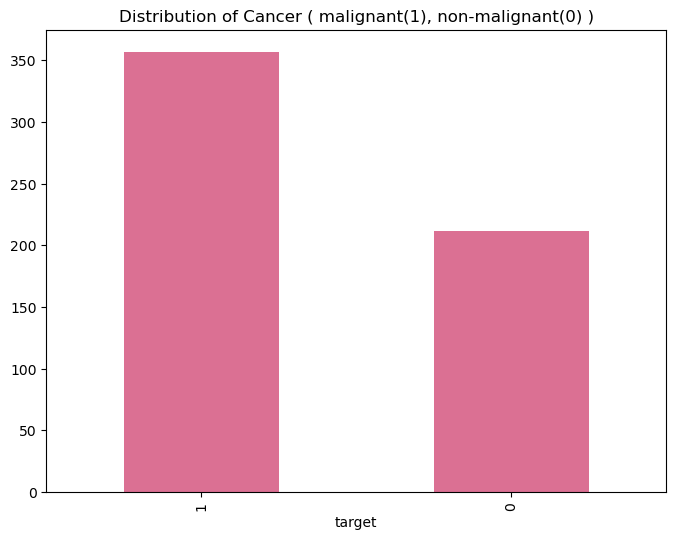

In [12]:
cancerous = df['target'].value_counts()
cancerous.plot(kind = 'bar', color = 'palevioletred', figsize = (8,6))
plt.title('Distribution of Cancer ( malignant(1), non-malignant(0) )')

<Axes: >

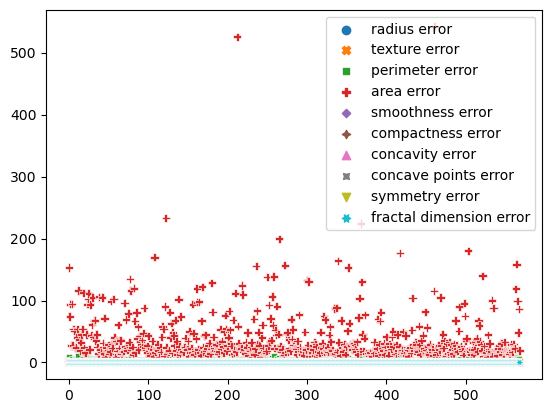

In [13]:
sns.scatterplot(data=df[['radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error','compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']])


<Axes: >

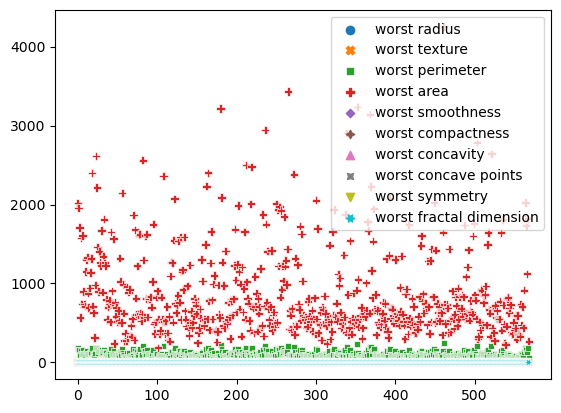

In [14]:
sns.scatterplot(data=df[['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness','worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']])


<Axes: >

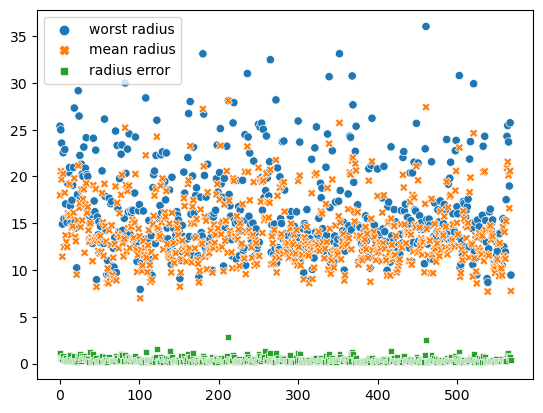

In [15]:
sns.scatterplot(data=df[['worst radius', 'mean radius', 'radius error']])

### split the dataset 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#Split (X, y) into: X_train, X_test, y_train, y_test; use a test_size = 0.2
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
#feature scaling, create a variable to use StandardScaler
sc = StandardScaler()

In [20]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [21]:
#display the shape of X_train
X_train.shape

(455, 29)

In [22]:
#display X_train
X_train[0]

array([ 0.58548281,  0.15396743,  0.00916939,  1.21698615,  0.61896824,
        0.50563825,  0.82744227,  0.74940167,  0.64884144,  0.05731352,
       -0.12501096, -0.06746812, -0.01221331, -1.09623966,  0.17235834,
       -0.19987514,  0.14729005, -0.29659819,  0.12103834,  0.33326921,
        0.86064688,  0.25455675,  0.18042282,  0.18862591,  1.14908556,
        0.42658471,  1.05631499,  1.26009124,  1.45976704])

In [23]:
#display the shape of X_test
X_test.shape

(114, 29)

# Applying Deep Learning Techniques

In [24]:
#initializing the ANN
#use a sequential model
#add a layer
#second layer
#compile model

# add a sequential model
model = Sequential()

# adding the first layer
model.add(Dense(18, input_shape=(29,), activation='relu'))

# adding the output layer
model.add(Dense(units=1, activation='sigmoid'))

#compiling the ANN
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

NameError: name 'Sequential' is not defined

In [ ]:
#summary of the model
model.summary()

In [ ]:
#use model.fit to train the ANN
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=5, epochs=10)

## Visualize the Model Loss

In [ ]:
#plot the model loss vs epocs
plt.figure(figsize=(14,6))
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss (mse)')
plt.legend(['Train', 'Val'], loc='upper right')

In [ ]:
#plot the model loss vs accuracy
plt.plot(model.history.history['accuracy'][:])
plt.plot(model.history.history['val_accuracy'][:])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Print accuracy 

In [ ]:
# your code goes here
loss, accuracy = model.evaluate(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
#display the prediction of first 5 values, then calculate mae, lastly print first 5 predictions
# Let's check how much we are off on average
# Enter three lines of code here:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
y_pred[0:5]

In [ ]:
#print mae value
mae

In [ ]:
#print the real value of record 19
y_pred[19]

In [ ]:
#use model.predict and numpy reshape, print predicted vlaue fo the same # above
model.predict(np.reshape(X_test[19], [1,29]))

## Confusion Matrix

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import itertools

In [ ]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

## Tunning Hyperparameters

In [ ]:
# Create a folder path for Hyperparameter tuning
folder_path = "my_dir/intro_to_kt/"

In [ ]:

# Remove any existing log files if they exist
folder_path = "my_dir/intro_to_kt/"
if os.path.exists(folder_path):
    # Remove the folder and its contents recursively
#     shutil.rmtree(folder_path)
    os.system("""rm -rf ./my_dir""")
    print(f"The folder '{folder_path}' has been deleted")
else: 
    print(f"The folder '{folder_path}' does not exist.")

### Hyperparamters Tunning:

##### The number of neurons in the dense layer
##### The learning rate is searched for the values 0.01, 0.001 or 0.0001.

In [ ]:
#Create a model-building functions
def model_builder(hp):
    
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_units_1', min_value=24, max_value=32, step=4), 
                    activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=hp.Choice('Learning_rate', values=[1e-2, 1e-3, 1e-4])),
                 loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
tuner = RandomSearch(model_builder, objective='val_accuracy', max_trials=10, 
                    directory='my_dir', project_name='intro_to_kt')

In [ ]:
# Search the hyperparameters to see which combination provides the best model results
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

In [ ]:
# Retrieve the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Display the best hyperparameters
print(f"The hyperparameters search is complete.")
print(f"The optimal number of neurons is {best_hps.get('dense_units_1')}.")

#### Build the final model using the optimal hyperparameters

In [ ]:
# Create the final model with the optimal hyperparameters
final_model = tuner.hypermodel.build(best_hps)

In [ ]:
#Fit Model
history = final_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

In [ ]:
# Find the best epoch
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print("The best epoch: %d" % (best_epoch))

In [ ]:
#Evaluate the model
eval_result = final_model.evaluate(X_train, y_train)
print("[test loss, test accuracy]:", eval_result)

In [ ]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

# Summary and Conclusions

The model performed well despite it need more adjustment in ANN model. With the hypertunning the model was able to reach a 97% accuracy, and the lost only 12% in predicting if a cancer is cancerous or non cancerous. Looking at the confusion matrix it was correct 73 times nearly 3 quarters of the time.

# Git hub link